<a href="https://colab.research.google.com/github/choisooyeon007/hello-world/blob/master/Kmeans_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving covid 27Jul.csv to covid 27Jul.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv("covid 27Jul.csv")
df.head()

,dong,2020-01-02 0:00,2020-01-02 1:00,2020-01-02 2:00,2020-01-02 3:00,2020-01-02 4:00,2020-01-02 5:00,2020-01-02 6:00,2020-01-02 7:00,2020-01-02 8:00,2020-01-02 9:00,2020-01-02 10:00,2020-01-02 11:00,2020-01-02 12:00,2020-01-02 13:00,2020-01-02 14:00,2020-01-02 15:00,2020-01-02 16:00,2020-01-02 17:00,2020-01-02 18:00,2020-01-02 19:00,2020-01-02 20:00,2020-01-02 21:00,2020-01-02 22:00,2020-01-02 23:00,2020-01-03 0:00,2020-01-03 1:00,2020-01-03 2:00,2020-01-03 3:00,2020-01-03 4:00,2020-01-03 5:00,2020-01-03 6:00,2020-01-03 7:00,2020-01-03 8:00,2020-01-03 9:00,2020-01-03 10:00,2020-01-03 11:00,2020-01-03 12:00,2020-01-03 13:00,2020-01-03 14:00,...,2020-03-21 8:00,2020-03-21 9:00,2020-03-21 10:00,2020-03-21 11:00,2020-03-21 12:00,2020-03-21 13:00,2020-03-21 14:00,2020-03-21 15:00,2020-03-21 16:00,2020-03-21 17:00,2020-03-21 18:00,2020-03-21 19:00,2020-03-21 20:00,2020-03-21 21:00,2020-03-21 22:00,2020-03-21 23:00,2020-03-22 0:00,2020-03-22 1:00,2020-03-22 2:00,2020-03-22 3:00,2020-03-22 4:00,2020-03-22 5:00,2020-03-22 6:00,2020-03-22 7:00,2020-03-22 8:00,2020-03-22 9:00,2020-03-22 10:00,2020-03-22 11:00,2020-03-22 12:00,2020-03-22 13:00,2020-03-22 14:00,2020-03-22 15:00,2020-03-22 16:00,2020-03-22 17:00,2020-03-22 18:00,2020-03-22 19:00,2020-03-22 20:00,2020-03-22 21:00,2020-03-22 22:00,2020-03-22 23:00
0,11110515,-2.85,-2.74,-2.75,-2.82,-3.04,-3.73,-4.16,-4.34,-8.31,-6.97,-7.28,-3.18,-5.63,-7.67,-5.92,-8.07,-9.08,-10.06,-7.12,-6.91,-4.38,-4.04,-2.05,-1.97,-0.60,-1.92,-2.36,-2.80,-2.92,-3.15,-3.60,-4.58,-8.66,-8.32,-6.40,-5.04,-3.26,-5.82,-5.09,...,-2.88,-4.81,-8.47,-10.19,-12.19,-11.52,-9.50,-9.08,-7.81,-9.42,-2.99,0.43,3.27,7.28,8.86,1.57,-0.09,-0.15,-0.20,0.01,0.15,-0.10,0.03,-1.17,-3.61,-5.49,-11.70,-11.35,-12.13,-11.64,-10.03,-7.83,-6.33,-1.85,1.93,2.20,4.32,4.69,6.35,0.45
1,11110530,-25.48,-23.48,-22.75,-25.47,-24.34,-21.14,-19.29,-22.07,-22.57,-22.73,-23.35,-25.00,-23.95,-25.49,-26.54,-26.30,-25.85,-23.90,-25.23,-26.01,-24.80,-25.46,-23.68,-20.68,-20.05,-18.90,-18.39,-20.96,-20.80,-17.95,-19.63,-24.70,-25.13,-26.03,-25.20,-23.48,-19.82,-19.21,-11.54,...,-25.97,-31.12,-34.13,-38.95,-43.23,-45.28,-48.35,-47.56,-48.41,-46.81,-45.65,-44.23,-40.18,-37.33,-33.20,-25.27,-26.30,-25.35,-26.28,-25.42,-27.49,-24.94,-25.72,-27.37,-32.74,-38.65,-42.93,-46.36,-46.66,-47.94,-46.78,-44.76,-41.99,-38.93,-37.85,-35.80,-34.05,-30.66,-28.69,-23.29
2,11110540,13.38,14.58,12.54,11.14,10.46,6.79,3.90,-4.84,-11.32,-12.93,-15.69,-13.84,-13.09,-11.53,-14.42,-12.85,-11.53,-13.86,-14.57,-13.48,-13.47,-9.40,-5.80,2.06,4.98,5.34,4.41,5.71,4.82,4.63,1.87,-5.28,-10.16,-11.31,-9.64,-9.40,-7.10,-4.61,-4.88,...,-19.92,-28.78,-35.85,-38.30,-37.37,-38.33,-38.36,-38.69,-40.51,-32.67,-32.34,-28.60,-28.22,-13.51,-9.30,-4.32,1.77,-0.03,-0.26,0.53,-2.77,-1.83,-1.96,-1.61,-5.13,-13.81,-21.24,-26.04,-29.28,-30.68,-29.43,-27.57,-25.48,-23.57,-21.74,-17.79,-13.48,-6.59,-5.04,-2.77
3,11110550,32.82,31.58,31.69,31.52,31.13,31.21,29.72,29.46,27.04,24.28,20.98,21.01,20.34,21.82,22.49,20.55,18.75,19.29,20.35,19.56,18.36,19.08,20.75,31.15,30.82,31.55,32.13,32.73,33.03,33.15,32.70,32.96,29.66,20.34,12.67,11.10,8.64,18.11,19.02,...,18.35,14.96,12.67,11.66,8.40,8.43,13.49,17.35,18.46,17.47,15.33,16.30,19.89,19.22,17.37,19.04,17.60,17.81,18.21,18.42,17.97,18.17,18.88,17.67,18.32,15.79,13.36,11.76,13.56,16.69,20.61,18.33,18.51,15.24,14.47,14.78,17.08,15.12,15.10,16.79
4,11110560,-7.49,-7.92,-8.62,-8.98,-9.17,-9.29,-9.70,-9.99,-7.59,-9.25,-8.73,-8.59,-7.92,-6.87,-6.04,-6.16,-8.68,-7.16,-5.39,-6.62,-5.58,-6.12,-8.16,-8.05,-9.05,-8.97,-10.81,-10.69,-11.14,-11.54,-11.09,-9.74,-7.30,-9.11,-9.80,-7.75,-7.93,-8.76,-5.32,...,-6.91,-5.02,-4.35,-2.79,-0.80,7.64,7.48,8.82,8.09,1.97,2.51,4.49,3.21,-0.38,-3.00,-9.55,-9.82,-9.62,-10.45,-10.50,-9.84,-9.83,-10.78,-10.62,-9.10,-9.06,-5.50,-0.64,-0.19,3.92,6.01,6.26,3.20,4.69,2.21,2.08,-0.01,-4.26,-4.49,-10.53


In [7]:
df=df.dropna(axis=1)
df.head()

,dong,2020-01-02 0:00,2020-01-02 1:00,2020-01-02 2:00,2020-01-02 3:00,2020-01-02 4:00,2020-01-02 5:00,2020-01-02 6:00,2020-01-02 7:00,2020-01-02 8:00,2020-01-02 9:00,2020-01-02 10:00,2020-01-02 11:00,2020-01-02 12:00,2020-01-02 13:00,2020-01-02 14:00,2020-01-02 15:00,2020-01-02 16:00,2020-01-02 17:00,2020-01-02 18:00,2020-01-02 19:00,2020-01-02 20:00,2020-01-02 21:00,2020-01-02 22:00,2020-01-02 23:00,2020-01-03 0:00,2020-01-03 1:00,2020-01-03 2:00,2020-01-03 3:00,2020-01-03 4:00,2020-01-03 5:00,2020-01-03 6:00,2020-01-03 7:00,2020-01-03 8:00,2020-01-03 9:00,2020-01-03 10:00,2020-01-03 11:00,2020-01-03 12:00,2020-01-03 13:00,2020-01-03 14:00,...,2020-03-21 8:00,2020-03-21 9:00,2020-03-21 10:00,2020-03-21 11:00,2020-03-21 12:00,2020-03-21 13:00,2020-03-21 14:00,2020-03-21 15:00,2020-03-21 16:00,2020-03-21 17:00,2020-03-21 18:00,2020-03-21 19:00,2020-03-21 20:00,2020-03-21 21:00,2020-03-21 22:00,2020-03-21 23:00,2020-03-22 0:00,2020-03-22 1:00,2020-03-22 2:00,2020-03-22 3:00,2020-03-22 4:00,2020-03-22 5:00,2020-03-22 6:00,2020-03-22 7:00,2020-03-22 8:00,2020-03-22 9:00,2020-03-22 10:00,2020-03-22 11:00,2020-03-22 12:00,2020-03-22 13:00,2020-03-22 14:00,2020-03-22 15:00,2020-03-22 16:00,2020-03-22 17:00,2020-03-22 18:00,2020-03-22 19:00,2020-03-22 20:00,2020-03-22 21:00,2020-03-22 22:00,2020-03-22 23:00
0,11110515,-2.85,-2.74,-2.75,-2.82,-3.04,-3.73,-4.16,-4.34,-8.31,-6.97,-7.28,-3.18,-5.63,-7.67,-5.92,-8.07,-9.08,-10.06,-7.12,-6.91,-4.38,-4.04,-2.05,-1.97,-0.60,-1.92,-2.36,-2.80,-2.92,-3.15,-3.60,-4.58,-8.66,-8.32,-6.40,-5.04,-3.26,-5.82,-5.09,...,-2.88,-4.81,-8.47,-10.19,-12.19,-11.52,-9.50,-9.08,-7.81,-9.42,-2.99,0.43,3.27,7.28,8.86,1.57,-0.09,-0.15,-0.20,0.01,0.15,-0.10,0.03,-1.17,-3.61,-5.49,-11.70,-11.35,-12.13,-11.64,-10.03,-7.83,-6.33,-1.85,1.93,2.20,4.32,4.69,6.35,0.45
1,11110530,-25.48,-23.48,-22.75,-25.47,-24.34,-21.14,-19.29,-22.07,-22.57,-22.73,-23.35,-25.00,-23.95,-25.49,-26.54,-26.30,-25.85,-23.90,-25.23,-26.01,-24.80,-25.46,-23.68,-20.68,-20.05,-18.90,-18.39,-20.96,-20.80,-17.95,-19.63,-24.70,-25.13,-26.03,-25.20,-23.48,-19.82,-19.21,-11.54,...,-25.97,-31.12,-34.13,-38.95,-43.23,-45.28,-48.35,-47.56,-48.41,-46.81,-45.65,-44.23,-40.18,-37.33,-33.20,-25.27,-26.30,-25.35,-26.28,-25.42,-27.49,-24.94,-25.72,-27.37,-32.74,-38.65,-42.93,-46.36,-46.66,-47.94,-46.78,-44.76,-41.99,-38.93,-37.85,-35.80,-34.05,-30.66,-28.69,-23.29
2,11110540,13.38,14.58,12.54,11.14,10.46,6.79,3.90,-4.84,-11.32,-12.93,-15.69,-13.84,-13.09,-11.53,-14.42,-12.85,-11.53,-13.86,-14.57,-13.48,-13.47,-9.40,-5.80,2.06,4.98,5.34,4.41,5.71,4.82,4.63,1.87,-5.28,-10.16,-11.31,-9.64,-9.40,-7.10,-4.61,-4.88,...,-19.92,-28.78,-35.85,-38.30,-37.37,-38.33,-38.36,-38.69,-40.51,-32.67,-32.34,-28.60,-28.22,-13.51,-9.30,-4.32,1.77,-0.03,-0.26,0.53,-2.77,-1.83,-1.96,-1.61,-5.13,-13.81,-21.24,-26.04,-29.28,-30.68,-29.43,-27.57,-25.48,-23.57,-21.74,-17.79,-13.48,-6.59,-5.04,-2.77
3,11110550,32.82,31.58,31.69,31.52,31.13,31.21,29.72,29.46,27.04,24.28,20.98,21.01,20.34,21.82,22.49,20.55,18.75,19.29,20.35,19.56,18.36,19.08,20.75,31.15,30.82,31.55,32.13,32.73,33.03,33.15,32.70,32.96,29.66,20.34,12.67,11.10,8.64,18.11,19.02,...,18.35,14.96,12.67,11.66,8.40,8.43,13.49,17.35,18.46,17.47,15.33,16.30,19.89,19.22,17.37,19.04,17.60,17.81,18.21,18.42,17.97,18.17,18.88,17.67,18.32,15.79,13.36,11.76,13.56,16.69,20.61,18.33,18.51,15.24,14.47,14.78,17.08,15.12,15.10,16.79
4,11110560,-7.49,-7.92,-8.62,-8.98,-9.17,-9.29,-9.70,-9.99,-7.59,-9.25,-8.73,-8.59,-7.92,-6.87,-6.04,-6.16,-8.68,-7.16,-5.39,-6.62,-5.58,-6.12,-8.16,-8.05,-9.05,-8.97,-10.81,-10.69,-11.14,-11.54,-11.09,-9.74,-7.30,-9.11,-9.80,-7.75,-7.93,-8.76,-5.32,...,-6.91,-5.02,-4.35,-2.79,-0.80,7.64,7.48,8.82,8.09,1.97,2.51,4.49,3.21,-0.38,-3.00,-9.55,-9.82,-9.62,-10.45,-10.50,-9.84,-9.83,-10.78,-10.62,-9.10,-9.06,-5.50,-0.64,-0.19,3.92,6.01,6.26,3.20,4.69,2.21,2.08,-0.01,-4.26,-4.49,-10.53


In [8]:
df1=df.set_index('dong')
df1.head()

,2020-01-02 0:00,2020-01-02 1:00,2020-01-02 2:00,2020-01-02 3:00,2020-01-02 4:00,2020-01-02 5:00,2020-01-02 6:00,2020-01-02 7:00,2020-01-02 8:00,2020-01-02 9:00,2020-01-02 10:00,2020-01-02 11:00,2020-01-02 12:00,2020-01-02 13:00,2020-01-02 14:00,2020-01-02 15:00,2020-01-02 16:00,2020-01-02 17:00,2020-01-02 18:00,2020-01-02 19:00,2020-01-02 20:00,2020-01-02 21:00,2020-01-02 22:00,2020-01-02 23:00,2020-01-03 0:00,2020-01-03 1:00,2020-01-03 2:00,2020-01-03 3:00,2020-01-03 4:00,2020-01-03 5:00,2020-01-03 6:00,2020-01-03 7:00,2020-01-03 8:00,2020-01-03 9:00,2020-01-03 10:00,2020-01-03 11:00,2020-01-03 12:00,2020-01-03 13:00,2020-01-03 14:00,2020-01-03 15:00,...,2020-03-21 8:00,2020-03-21 9:00,2020-03-21 10:00,2020-03-21 11:00,2020-03-21 12:00,2020-03-21 13:00,2020-03-21 14:00,2020-03-21 15:00,2020-03-21 16:00,2020-03-21 17:00,2020-03-21 18:00,2020-03-21 19:00,2020-03-21 20:00,2020-03-21 21:00,2020-03-21 22:00,2020-03-21 23:00,2020-03-22 0:00,2020-03-22 1:00,2020-03-22 2:00,2020-03-22 3:00,2020-03-22 4:00,2020-03-22 5:00,2020-03-22 6:00,2020-03-22 7:00,2020-03-22 8:00,2020-03-22 9:00,2020-03-22 10:00,2020-03-22 11:00,2020-03-22 12:00,2020-03-22 13:00,2020-03-22 14:00,2020-03-22 15:00,2020-03-22 16:00,2020-03-22 17:00,2020-03-22 18:00,2020-03-22 19:00,2020-03-22 20:00,2020-03-22 21:00,2020-03-22 22:00,2020-03-22 23:00
dong,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11110515,-2.85,-2.74,-2.75,-2.82,-3.04,-3.73,-4.16,-4.34,-8.31,-6.97,-7.28,-3.18,-5.63,-7.67,-5.92,-8.07,-9.08,-10.06,-7.12,-6.91,-4.38,-4.04,-2.05,-1.97,-0.60,-1.92,-2.36,-2.80,-2.92,-3.15,-3.60,-4.58,-8.66,-8.32,-6.40,-5.04,-3.26,-5.82,-5.09,-5.50,...,-2.88,-4.81,-8.47,-10.19,-12.19,-11.52,-9.50,-9.08,-7.81,-9.42,-2.99,0.43,3.27,7.28,8.86,1.57,-0.09,-0.15,-0.20,0.01,0.15,-0.10,0.03,-1.17,-3.61,-5.49,-11.70,-11.35,-12.13,-11.64,-10.03,-7.83,-6.33,-1.85,1.93,2.20,4.32,4.69,6.35,0.45
11110530,-25.48,-23.48,-22.75,-25.47,-24.34,-21.14,-19.29,-22.07,-22.57,-22.73,-23.35,-25.00,-23.95,-25.49,-26.54,-26.30,-25.85,-23.90,-25.23,-26.01,-24.80,-25.46,-23.68,-20.68,-20.05,-18.90,-18.39,-20.96,-20.80,-17.95,-19.63,-24.70,-25.13,-26.03,-25.20,-23.48,-19.82,-19.21,-11.54,-7.99,...,-25.97,-31.12,-34.13,-38.95,-43.23,-45.28,-48.35,-47.56,-48.41,-46.81,-45.65,-44.23,-40.18,-37.33,-33.20,-25.27,-26.30,-25.35,-26.28,-25.42,-27.49,-24.94,-25.72,-27.37,-32.74,-38.65,-42.93,-46.36,-46.66,-47.94,-46.78,-44.76,-41.99,-38.93,-37.85,-35.80,-34.05,-30.66,-28.69,-23.29
11110540,13.38,14.58,12.54,11.14,10.46,6.79,3.90,-4.84,-11.32,-12.93,-15.69,-13.84,-13.09,-11.53,-14.42,-12.85,-11.53,-13.86,-14.57,-13.48,-13.47,-9.40,-5.80,2.06,4.98,5.34,4.41,5.71,4.82,4.63,1.87,-5.28,-10.16,-11.31,-9.64,-9.40,-7.10,-4.61,-4.88,-6.36,...,-19.92,-28.78,-35.85,-38.30,-37.37,-38.33,-38.36,-38.69,-40.51,-32.67,-32.34,-28.60,-28.22,-13.51,-9.30,-4.32,1.77,-0.03,-0.26,0.53,-2.77,-1.83,-1.96,-1.61,-5.13,-13.81,-21.24,-26.04,-29.28,-30.68,-29.43,-27.57,-25.48,-23.57,-21.74,-17.79,-13.48,-6.59,-5.04,-2.77
11110550,32.82,31.58,31.69,31.52,31.13,31.21,29.72,29.46,27.04,24.28,20.98,21.01,20.34,21.82,22.49,20.55,18.75,19.29,20.35,19.56,18.36,19.08,20.75,31.15,30.82,31.55,32.13,32.73,33.03,33.15,32.70,32.96,29.66,20.34,12.67,11.10,8.64,18.11,19.02,19.87,...,18.35,14.96,12.67,11.66,8.40,8.43,13.49,17.35,18.46,17.47,15.33,16.30,19.89,19.22,17.37,19.04,17.60,17.81,18.21,18.42,17.97,18.17,18.88,17.67,18.32,15.79,13.36,11.76,13.56,16.69,20.61,18.33,18.51,15.24,14.47,14.78,17.08,15.12,15.10,16.79
11110560,-7.49,-7.92,-8.62,-8.98,-9.17,-9.29,-9.70,-9.99,-7.59,-9.25,-8.73,-8.59,-7.92,-6.87,-6.04,-6.16,-8.68,-7.16,-5.39,-6.62,-5.58,-6.12,-8.16,-8.05,-9.05,-8.97,-10.81,-10.69,-11.14,-11.54,-11.09,-9.74,-7.30,-9.11,-9.80,-7.75,-7.93,-8.76,-5.32,-6.16,...,-6.91,-5.02,-4.35,-2.79,-0.80,7.64,7.48,8.82,8.09,1.97,2.51,4.49,3.21,-0.38,-3.00,-9.55,-9.82,-9.62,-10.45,-10.50,-9.84,-9.83,-10.78,-10.62,-9.10,-9.06,-5.50,-0.64,-0.19,3.92,6.01,6.26,3.20,4.69,2.21,2.08,-0.01,-4.26,-4.49,-10.53


In [12]:
#df1.index.astype('object')
#df1.columns=pd.to_datetime(df1.columns)
#df1.dtypes

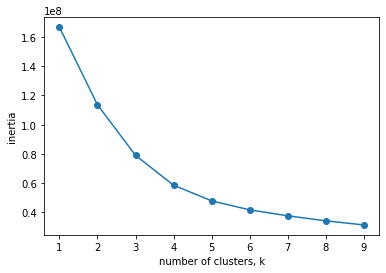

In [13]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df1.values)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [14]:
kmeans=KMeans(n_clusters=4).fit(df1.values)
kmeans.inertia_


58606895.04716685

In [15]:
kmeans.labels_
df1['cluster']=kmeans.labels_
df1.head()


,2020-01-02 00:00:00,2020-01-02 01:00:00,2020-01-02 02:00:00,2020-01-02 03:00:00,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,2020-01-02 14:00:00,2020-01-02 15:00:00,2020-01-02 16:00:00,2020-01-02 17:00:00,2020-01-02 18:00:00,2020-01-02 19:00:00,2020-01-02 20:00:00,2020-01-02 21:00:00,2020-01-02 22:00:00,2020-01-02 23:00:00,2020-01-03 00:00:00,2020-01-03 01:00:00,2020-01-03 02:00:00,2020-01-03 03:00:00,2020-01-03 04:00:00,2020-01-03 05:00:00,2020-01-03 06:00:00,2020-01-03 07:00:00,2020-01-03 08:00:00,2020-01-03 09:00:00,2020-01-03 10:00:00,2020-01-03 11:00:00,2020-01-03 12:00:00,2020-01-03 13:00:00,2020-01-03 14:00:00,2020-01-03 15:00:00,...,2020-03-21 09:00:00,2020-03-21 10:00:00,2020-03-21 11:00:00,2020-03-21 12:00:00,2020-03-21 13:00:00,2020-03-21 14:00:00,2020-03-21 15:00:00,2020-03-21 16:00:00,2020-03-21 17:00:00,2020-03-21 18:00:00,2020-03-21 19:00:00,2020-03-21 20:00:00,2020-03-21 21:00:00,2020-03-21 22:00:00,2020-03-21 23:00:00,2020-03-22 00:00:00,2020-03-22 01:00:00,2020-03-22 02:00:00,2020-03-22 03:00:00,2020-03-22 04:00:00,2020-03-22 05:00:00,2020-03-22 06:00:00,2020-03-22 07:00:00,2020-03-22 08:00:00,2020-03-22 09:00:00,2020-03-22 10:00:00,2020-03-22 11:00:00,2020-03-22 12:00:00,2020-03-22 13:00:00,2020-03-22 14:00:00,2020-03-22 15:00:00,2020-03-22 16:00:00,2020-03-22 17:00:00,2020-03-22 18:00:00,2020-03-22 19:00:00,2020-03-22 20:00:00,2020-03-22 21:00:00,2020-03-22 22:00:00,2020-03-22 23:00:00,cluster
dong,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11110515,-2.85,-2.74,-2.75,-2.82,-3.04,-3.73,-4.16,-4.34,-8.31,-6.97,-7.28,-3.18,-5.63,-7.67,-5.92,-8.07,-9.08,-10.06,-7.12,-6.91,-4.38,-4.04,-2.05,-1.97,-0.60,-1.92,-2.36,-2.80,-2.92,-3.15,-3.60,-4.58,-8.66,-8.32,-6.40,-5.04,-3.26,-5.82,-5.09,-5.50,...,-4.81,-8.47,-10.19,-12.19,-11.52,-9.50,-9.08,-7.81,-9.42,-2.99,0.43,3.27,7.28,8.86,1.57,-0.09,-0.15,-0.20,0.01,0.15,-0.10,0.03,-1.17,-3.61,-5.49,-11.70,-11.35,-12.13,-11.64,-10.03,-7.83,-6.33,-1.85,1.93,2.20,4.32,4.69,6.35,0.45,3
11110530,-25.48,-23.48,-22.75,-25.47,-24.34,-21.14,-19.29,-22.07,-22.57,-22.73,-23.35,-25.00,-23.95,-25.49,-26.54,-26.30,-25.85,-23.90,-25.23,-26.01,-24.80,-25.46,-23.68,-20.68,-20.05,-18.90,-18.39,-20.96,-20.80,-17.95,-19.63,-24.70,-25.13,-26.03,-25.20,-23.48,-19.82,-19.21,-11.54,-7.99,...,-31.12,-34.13,-38.95,-43.23,-45.28,-48.35,-47.56,-48.41,-46.81,-45.65,-44.23,-40.18,-37.33,-33.20,-25.27,-26.30,-25.35,-26.28,-25.42,-27.49,-24.94,-25.72,-27.37,-32.74,-38.65,-42.93,-46.36,-46.66,-47.94,-46.78,-44.76,-41.99,-38.93,-37.85,-35.80,-34.05,-30.66,-28.69,-23.29,3
11110540,13.38,14.58,12.54,11.14,10.46,6.79,3.90,-4.84,-11.32,-12.93,-15.69,-13.84,-13.09,-11.53,-14.42,-12.85,-11.53,-13.86,-14.57,-13.48,-13.47,-9.40,-5.80,2.06,4.98,5.34,4.41,5.71,4.82,4.63,1.87,-5.28,-10.16,-11.31,-9.64,-9.40,-7.10,-4.61,-4.88,-6.36,...,-28.78,-35.85,-38.30,-37.37,-38.33,-38.36,-38.69,-40.51,-32.67,-32.34,-28.60,-28.22,-13.51,-9.30,-4.32,1.77,-0.03,-0.26,0.53,-2.77,-1.83,-1.96,-1.61,-5.13,-13.81,-21.24,-26.04,-29.28,-30.68,-29.43,-27.57,-25.48,-23.57,-21.74,-17.79,-13.48,-6.59,-5.04,-2.77,3
11110550,32.82,31.58,31.69,31.52,31.13,31.21,29.72,29.46,27.04,24.28,20.98,21.01,20.34,21.82,22.49,20.55,18.75,19.29,20.35,19.56,18.36,19.08,20.75,31.15,30.82,31.55,32.13,32.73,33.03,33.15,32.70,32.96,29.66,20.34,12.67,11.10,8.64,18.11,19.02,19.87,...,14.96,12.67,11.66,8.40,8.43,13.49,17.35,18.46,17.47,15.33,16.30,19.89,19.22,17.37,19.04,17.60,17.81,18.21,18.42,17.97,18.17,18.88,17.67,18.32,15.79,13.36,11.76,13.56,16.69,20.61,18.33,18.51,15.24,14.47,14.78,17.08,15.12,15.10,16.79,1
11110560,-7.49,-7.92,-8.62,-8.98,-9.17,-9.29,-9.70,-9.99,-7.59,-9.25,-8.73,-8.59,-7.92,-6.87,-6.04,-6.16,-8.68,-7.16,-5.39,-6.62,-5.58,-6.12,-8.16,-8.05,-9.05,-8.97,-10.81,-10.69,-11.14,-11.54,-11.09,-9.74,-7.30,-9.11,-9.80,-7.75,-7.93,-8.76,-5.32,-6.16,...,-5.02,-4.

In [16]:
df00=df1[df1['cluster']==0]
df01=df1[df1['cluster']==1]
df02=df1[df1['cluster']==2]
df03=df1[df1['cluster']==3]



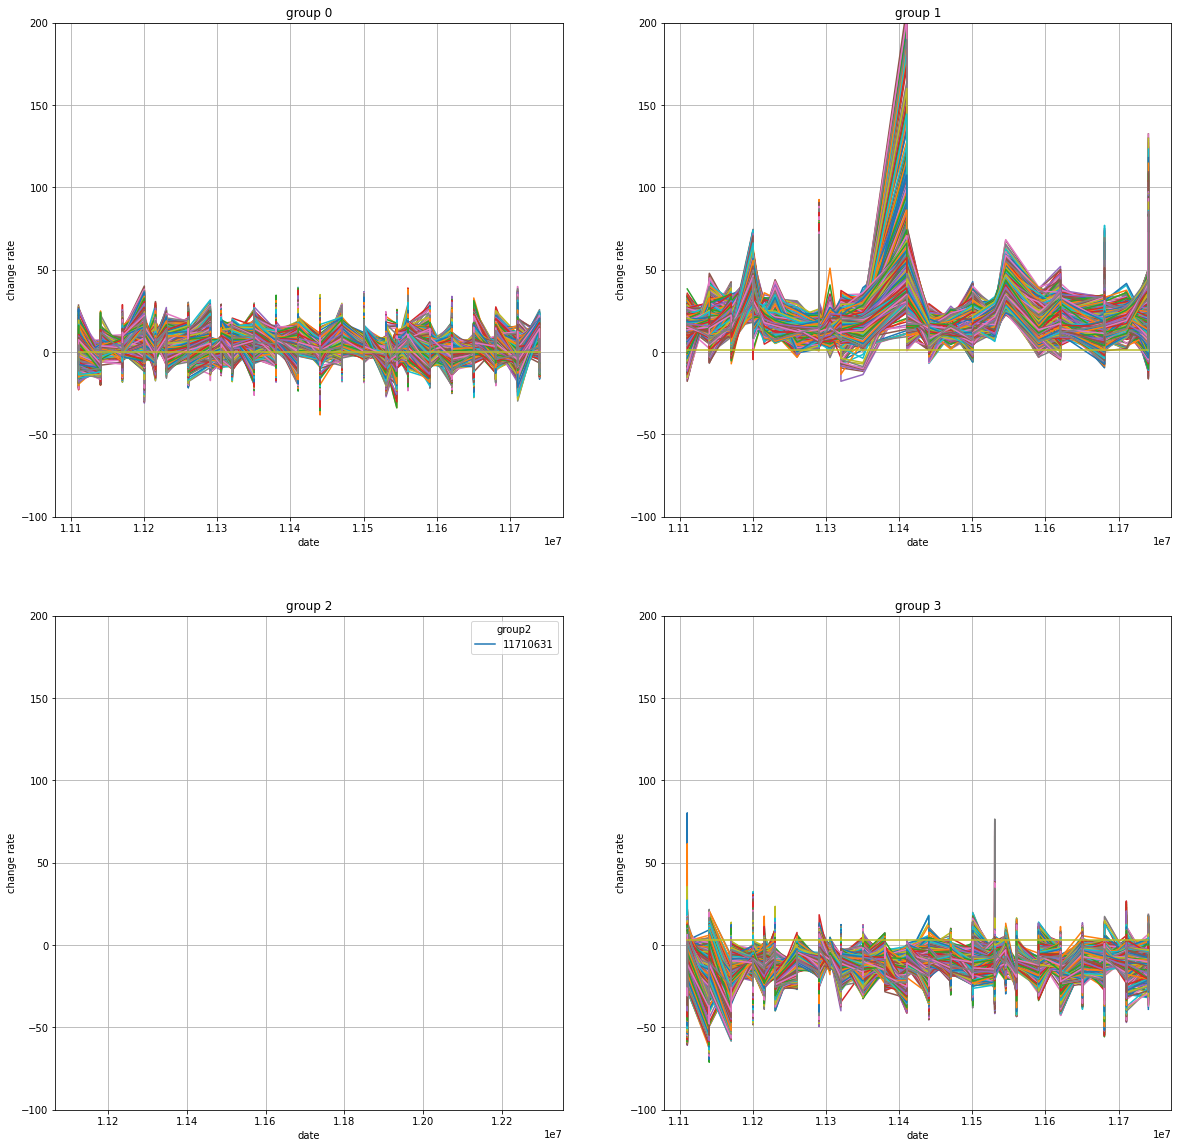

In [19]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.ylim(-100,200)
plt.xlabel('date')
plt.ylabel('change rate')
plt.title('group 0')
plt.plot(df00, label=df00.index) 
plt.grid()
#plt.legend(df00.index, title='group0', ncol=5)

plt.subplot(2,2,2)
plt.ylim(-100,200)
plt.xlabel('date')
plt.ylabel('change rate')
plt.title('group 1')
plt.plot(df01, label=df01.index) 
plt.grid()
#plt.legend(df01.index, title='group1',ncol=5)


plt.subplot(2,2,3)
plt.ylim(-100,200)
plt.xlabel('date')
plt.ylabel('change rate')
plt.title('group 2')
plt.plot(df02, label=df02.index) 
plt.grid()
plt.legend(df02.index, title='group2',ncol=5)

plt.subplot(2,2,4)
plt.ylim(-100,200)
plt.xlabel('date')
plt.ylabel('change rate')
plt.title('group 3')
plt.plot(df03, label=df03.index) 
plt.grid()
#plt.legend(df03.index, title='group3', ncol=5)


plt.show()